In [1]:
# Run this once and proceed - no need to run twice in one session
# Load the Drive helper and mount

# Got some of the code from here : https://colab.research.google.com/drive/1b8pVMMoR37a3b9ICo8TMqMLVD-WvbzTk#scrollTo=3E94MjxkR_hI
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
# from keras.preprocessing.image import img_to_array
# from keras.applications.vgg16 import preprocess_input
# from keras.preprocessing.image import load_img
from IPython.display import Image, display


warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

# import missingno as mn
# This will prompt for authorization.
# drive.mount('/content/drive')

In [2]:
# Loading images into car_dataset
# !ls "/content/drive/My Drive/ML_Spring2020"

# This gets all the image links from google drive
# !unzip -q "/content/drive/My Drive/ML_Spring2020/the-car-connection-picture-dataset.zip"

# ----------------------------------- Choosing randomly images -----------------------------------
# from os import listdir
# import random
# import shutil

# car = [f for f in listdir('/content/drive/My Drive/ML_Spring2020/chosen-car-dataset/')]
# print(len(car))
# carDir = '/content/drive/My Drive/ML_Spring2020/chosen-car-dataset/'
# carDirToCopy = '/content/drive/My Drive/ML_Spring2020/2500-car-dataset/'
# count = 0
# used_number = []
# while count != 2500: # stop at 5000 photos
#     # get random number (index) for dataset
#     random_int = random.randint(0, len(car) - 1)

#     #keep track of number generated, dont use a number twice
#     if random_int in used_number:
#         continue

#     #keep track of number generated, dont use a number twice
#     used_number.append(random_int)
    
#     # print(carDir + car[random_int])
#     # print('New: ', carDirToCopy + car[random_int])
#     shutil.copyfile(carDir + car[random_int], carDirToCopy + car[random_int]) # name of the image
#     count = count + 1

# print("Finished copying")


2500
Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_ylA.jpg


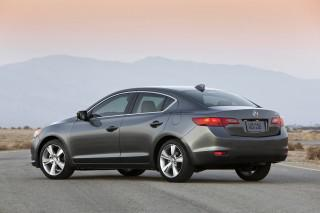

In [53]:
# image_path = "/content/drive/My Drive/ML_Spring2020/2500-car-dataset"
image_path = "C:/Users/tas/Git_Folder/Machine_Learning_SMU/2500-car-dataset/"

def loadImagesAndName(path):
    '''Put files into lists and return them as one list with all images 
     in the folder'''
    image_files = sorted([os.path.join(path, file)
                          for file in os.listdir(path + "")
                          if file.endswith('.jpg')])
    
    image_names = [x.split('/')[6] for x in image_files]
    return image_files, image_names

car_dataset, car_names = loadImagesAndName(image_path)

print(len(car_names))

print(car_names[0])
display(Image(car_dataset[0]))

names=[]
for i in car_names:
  dummy = i.split('_')
  names.append(dummy[0] + " " + dummy[1])


In [4]:
print('This is Taylor Slaton checking in')
print('This is Skyler Tran checking in')


This is Taylor Slaton checking in
This is Skyler Tran checking in


# **Lab Assignment Two: Exploring Image Data**

You are to perform preprocessing and exploratory analysis of a data set: exploring the statistical summaries of the features, visualizing the attributes, and addressing data quality. This report is worth 10% of the final grade. Please upload a report (one per team) with all code used, visualizations, and text in a rendered Jupyter notebook. Any visualizations that cannot be embedded in the notebook, please provide screenshots of the output.

### **Dataset Requirements**
Choose a dataset that is comprised of image data. The data should be directories of images. That is, the dataset should not yet be pre-processed. The following are required for the dataset:
<ol>
  <li> The data includes at least 1000 images </li>
  <li> The size of the images should be larger than 20x20 pixels</li>
  <li>The dataset should have a well defined prediction task (i.e., a label for each image)</li>
</ol>
A note on grading: This lab is mostly about visualizing and understanding your dataset. The largest share of the points is from how you interpret the visuals that you make. Making the visuals is not enough to satisfy each of the rubrics below—you should appropriately explain what the implications of the visualizations are. In other words, expect about 20% of the available points for visuals that have no substantive discussion. 


### **Business Understanding**
***20 points***
Give an overview of the dataset. Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). What is the prediction task for your dataset and which third parties would be interested in the results? Why is this data important? Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to the identified third parties? Be specific and use your own words to describe the aspects of the data. 

*Explanation* <br><br>
This data set includes around 60,000 pictures of cars. These are different makes and models of cars, including interiour and exteriour pictures. These pictures range different angles, some pictures having been taken on a show room floor, some pictures of cars on the road. The database has a photo and a name, the name including information on make, model, year, MSRP, front wheel size (in), SAE Net Horsepower @ RPM, displacement, engine type, width, max w/o mirrors (in), height, overall (in), length, overall (in), gas mileage, drivetrain, passenger capacity, passenger doors, and body style. <br>
What we would like to use this dataset for is to possibly analyze photos of cars at lights or on the road so that a possibly suspicious car could be caught or found. This could catch the interest of police or three letter agencies, such as the FBI, CIA, etc. <br>
An example of where this would be useful could be in searching for a car from an amber alert. If there is a car that has been tied to an amber alert, say a gray Audi A5, it would be useful to be able to find where a car of this type has passed through an intersection near where the child was last found. This would allow a police department to find out where this car, and by extension possibly a missing child, was.  <br>
This is important because it could lead to the ability to track criminal and possibly even save their victims. While it couldn't be a fool proof system, it could help in tougher cases. <br>
As stated before, this dataset contains pictures of cars taken on show room floors and on streets. This means these images are too "nice" to be compared to pictures from, say, traffic lights. We plan to solve this issue by lowering the resolution of these photos and adding a bit of static to make them more realistic. <br>
To be able to work, this algorithm needs to be able to distinguish color, make, and model mainly. Values like year and tire height, while limiting the amount of cars that would be tagged, are more specific and also smaller when it comes to importance. A honda civic, for example, has a basic look that changes very little year to year. These values could be used as the dataset improves or once a first run through to find a make, model, and color is attempted. But we will mainly focus on make, model, and color. <br>
The importance for this dataset to find a correct value is dependent on how it is used. The intention for this system isn't to be an end all be all decision, but rather to give more indication and faster analysis for the target, aka police/FBI/CIA/etc. This system would create a list of possible cars and locations. Then a person would look at this list of possibilities for any specific markers, for a specific year, etc. This means that we need to limit the amount of false negatives and not worry so much on false positives. A human can easily and quickly distinguish in a smaller list wherther there is a false positive, but it would be nearly impossible to know that there is a picture of a car within the database that was left out. Due to the nature of how this dataset would be used, we need to match what is typically used in the justice system.
<ul>
<li>A polygraph test is said to have 90% accuracy (Citation 1)</li>
<li>Fingerprinting has false positives 1 in every 18 to 1 in every 30, so 95-97 percent accuracy (Citation 2)</li>
</ul>

In fact, most values are within the 90% range. This leads me to conclude we need to have a rate of false positive under 5%.

<ol>
<li>https://apoa.memberclicks.net/assets/docs/polygraph_404.pdf</li>
<li>http://theconversation.com/fingerprinting-to-solve-crimes-not-as-robust-as-you-think-85534</li>
</ol>

### **Data Preparation**
***10 points***

***5 points*** Read in your images as numpy arrays. Resize and recolor images as necessary <br>
***4 points*** Linearize the images to create a table of 1-D image features (each row should be one image) <br>
***1 points*** Visualize several images

In [5]:
# read in images as numpy arrays
import cv2 # this needs to convert image to np array
# from google.colab.patches import cv2_imshow # because cv2.imshow will cause colab to crash!

# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Grayscale


%time array_of_car_images = [cv2.imread(car) for car in car_dataset]



Wall time: 5.09 s


In [6]:
# summarize shape of the pixel array
# ------ resize -------

# height = 150
# width = 225
# dim = (width, height)
# image = cv2.resize(image, dim, interpolation=cv2.INTER_LINEAR)

# display the array of pixels as an image
# cv2_imshow(image)

# reshape
# X = image.reshape(len(image), -1)
# print(X)
# Show content of array_of_car_images[0]
# Will give error if trying to print the whole set

# resize
height = 150
width = 225

#### Linearize images table 1-D image features


In [7]:
def resize_and_flatten_images():
  arr = []
  dim = (width, height)
  for car_image_info in array_of_car_images:
    image = cv2.resize(car_image_info, dim, interpolation=cv2.INTER_LINEAR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.ravel()
    arr.append(image)
  return arr

flatten_car_array = resize_and_flatten_images()


#### Visualize several images


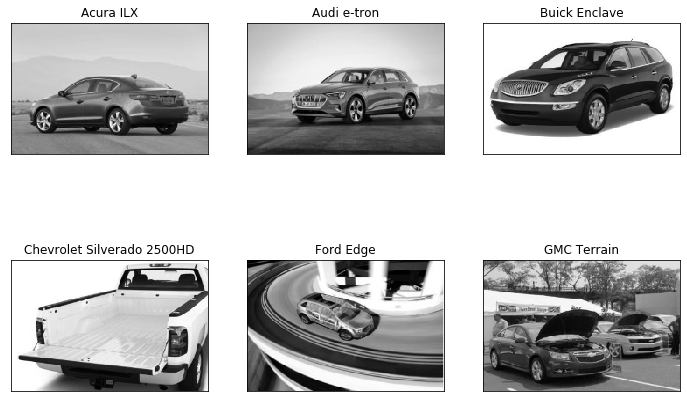

In [8]:
# reconstruct image from flattening array
n_row = 2
n_col = 3
plt.figure(figsize=(4 * n_col, 4 * n_row))
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(flatten_car_array[i*210].reshape((height, width)), cmap=plt.cm.gray)
    plt.title(names[i*210], size=12)
    plt.xticks(())
    plt.yticks(())
    

### **Data Reduction**
***60 points*** <br>
***5 points*** Perform linear dimensionality reduction of the images using principal components analysis. Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data. Explain your analysis and conclusion. <br>
***5 points*** Perform non-linear dimensionality reduction of your image data. <br>
***20 points*** Compare the representation using non-linear dimensions to using linear dimensions. The method you choose to compare dimensionality methods should quantitatively explain which method is better at representing the images with fewer components. Be aware that mean-squared error may not be a good measurement for kPCA.  Do you prefer one method over another? Why? <br>
***10 points*** Perform feature extraction upon the images using any feature extraction technique (e.g., gabor filters, ordered gradients, DAISY, etc.). <br>
***20 points*** Does this feature extraction method show promise for your prediction task? Why? Use visualizations to analyze this questions. For example, visualize the differences between statistics of extracted features in each target class. Another option, use a heat map of the pairwise differences (ordered by class) among all extracted features. Another option, build a nearest neighbor classifier to see actual classification performance. <br>



In [9]:
import plotly
from plotly.graph_objs import Bar, Line
from plotly.graph_objs import Scatter, Layout
from plotly.graph_objs.scatter import Marker
from plotly.graph_objs.layout import XAxis, YAxis

def plot_explained_variance(pca):
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })
      

In [10]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4): #fix row and col as needed
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [11]:
# Linear dimensionality reduction on images
from sklearn.decomposition import PCA
import copy
n_components = 400
flatten_car_array = np.array(flatten_car_array)
X = copy.deepcopy(flatten_car_array)
print ("Extracting the top %d cars from %d" % (
    n_components, flatten_car_array.shape[0]))

n_samples, n_features = X.shape

Extracting the top 400 cars from 2500


In [12]:
#Calculate full PCA
pca = PCA(n_components=n_components)
%time pca.fit(X)
eigencar = pca.components_.reshape((n_components, height, width))


Wall time: 27 s


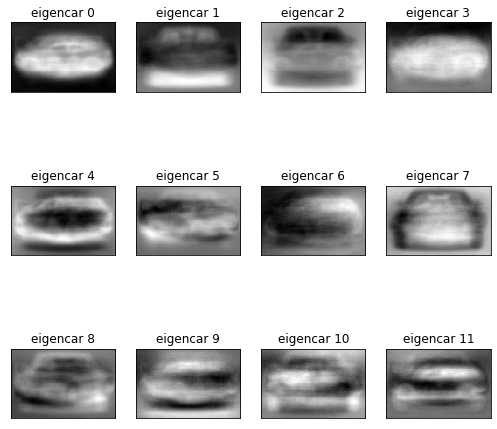

In [13]:
eigencar_titles = ["eigencar %d" % i for i in range(eigencar.shape[0])]
plot_gallery(eigencar, eigencar_titles, height, width) #rows and cols display 


*Explanation for above*

The eigencars looks for the kind of car look as well as for how the car is facing. 
This is actually more helpful than just the car type. While you might know you are looking for a sedan, you are going to want to know more than one angle of the sedan. If you only analyze how it looks from the front, you might miss the opportunity to find the car going passed a traffic camera sideways. To be able to accurately anaylze this data, we need 400 dimensions. This is so we can show the different kinds of cars, as well as the different angles for the cars. There are three main angles to focus on, the front of a car and the left and right sides of a car. While diagonals happen as well, they are similar enough to the side that it extends that. We have convertibles, coupes, crossovers, hatchbacks, minivans, pickup trucks, SUVS, and sedans. This means there are 8 kinds of vehicles within this data. This means were are looking for an average of 24 different photos of vehicles at different angles. By selecting 400 photos, we allow the averages to have up to 16 different photos in each average.<br/>
As we covered above in our business understanding, we need to try to have an accuracy of 95% or above. The graphs of variance above shows that for the PCA to have a variance above 90, we need to have around 400 features. This confirms the analysis above. 



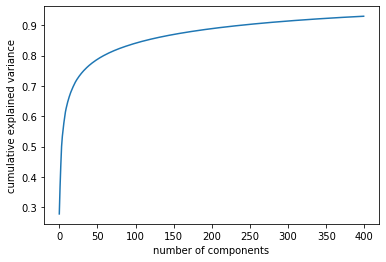

In [14]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [15]:
# visualize variance
plot_explained_variance(pca) # These basically are the same

# analyze how many dimensions are required

*Explanation for above*

The eigencars looks for the kind of car look as well as for how the car is facing. This is actually more helpful than just the car type. While you might know you are looking for a sedan, you are going to want to know more than one angle of the sedan. If you only analyze how it looks from the front, you might miss the opportunity to find the car going passed a traffic camera sideways. To be able to accurately anaylze this data, we need 400 dimensions. This is so we can show the different kinds of cars, as well as the different angles for the cars. There are three main angles to focus on, the front of a car and the left and right sides of a car. While diagonals happen as well, they are similar enough to the side that it extends that. We have convertibles, coupes, crossovers, hatchbacks, minivans, pickup trucks, SUVS, and sedans. This means there are 8 kinds of vehicles within this data. This means were are looking for an average of 24 different photos of vehicles at different angles. By selecting 400 photos, we allow the averages to have up to 16 different photos in each average.


In [16]:
%%time
# Perform non-linnear dimensionality reduction on images
print("Non-linear")
from sklearn.decomposition import KernelPCA

n_components = 400 # 400 sometimes converges, sometimes doesnt
print ("Extracting the top %d eigencars from %d cars, ALSO getting inverse transform" % (n_components, X.shape[0]))

kpca = KernelPCA(n_components=n_components, kernel='rbf', 
                fit_inverse_transform=True, gamma=0.1, # 12 is the original but wont converge so I use 0.1
                remove_zero_eig=True)  

X_for_kpca = copy.deepcopy(X)
print(X_for_kpca)
kpca.fit(X_for_kpca)

Non-linear
Extracting the top 400 eigencars from 2500 cars, ALSO getting inverse transform
[[197 197 198 ... 150 146 147]
 [255 255 255 ... 255 255 255]
 [ 33  32  30 ... 139 136 135]
 ...
 [143 143 144 ... 181 181 177]
 [160 160 160 ... 208 208 208]
 [182 182 182 ...  24  22  20]]
Wall time: 23.7 s


KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
          fit_inverse_transform=True, gamma=0.1, kernel='rbf',
          kernel_params=None, max_iter=None, n_components=400, n_jobs=None,
          random_state=None, remove_zero_eig=True, tol=0)

In [17]:
from ipywidgets import widgets

widgets.interact(lambda x: print(x),x=(0,5,1))

interactive(children=(IntSlider(value=2, description='x', max=5), Output()), _dom_classes=('widget-interact',)…

<function __main__.<lambda>(x)>

*Explanation for above*

(small explanation explaining what looking at)

In [18]:
# Compare linear and nonlinear
def plt_reconstruct(idx_to_reconstruct):
    idx_to_reconstruct = np.round(idx_to_reconstruct)
    
    reconstructed_image = pca.inverse_transform(pca.transform(X[idx_to_reconstruct].reshape(1, -1)))
    reconstructed_image_kpca = kpca.inverse_transform(kpca.transform(X[idx_to_reconstruct].reshape(1, -1)))
    
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,4,1)
    plt.imshow(X[idx_to_reconstruct].reshape((height, width)), cmap=plt.cm.gray)
    plt.title(names[idx_to_reconstruct])
    plt.grid(False)
    
    plt.subplot(1,4,2)
    plt.imshow(reconstructed_image.reshape((height, width)), cmap=plt.cm.gray)
    plt.title('Full PCA')
    plt.grid(False)
    
    plt.subplot(1,4,3)
    plt.imshow(reconstructed_image_kpca.reshape((height, width)), cmap=plt.cm.gray)
    plt.title('Kernel PCA')
    plt.grid(False)
    
    
widgets.interact(plt_reconstruct,idx_to_reconstruct=(0,n_samples-1,1),__manual=True)

# Which is better with fewer componenets

interactive(children=(IntSlider(value=1249, description='idx_to_reconstruct', max=2499), Output()), _dom_class…

<function __main__.plt_reconstruct(idx_to_reconstruct)>

*Explanation for above*

In this step we took a look at nonlinear dimensionality reduction on our image set so that we may compare PCA and KPCA. 

As can be seen in our comparison of the visualizations, PCA performs better than KPCA on our data set. This indicates that our dataset is more linear than it is nonlinear. This is probably due to the fact that most cars have a similar shape with slight variations in body, size, and color. This would mean that using PCA would perform better than KPCA as the data doesn't need to be treated as nonlinear data. The linear dimensionality reduction performed and looked better, thus this is the reduction that our dataset will use.

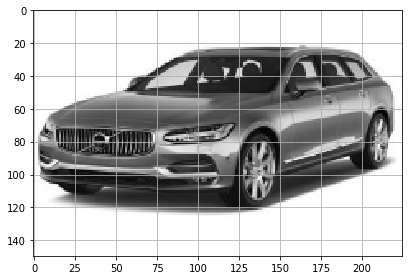

In [19]:
# Perform feature extraction using feature extraction technique --- DAISY
from skimage.io import imshow

idx_to_reconstruct = int(np.random.rand(1)*len(X))
img  = X[idx_to_reconstruct].reshape((height,width))
imshow(img)
plt.grid()

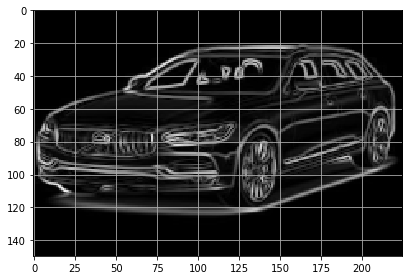

In [20]:
from skimage.filters import sobel_h, sobel_v

gradient_mag = np.sqrt(sobel_v(img)**2 + sobel_h(img)**2 ) 
imshow(gradient_mag)
plt.grid()

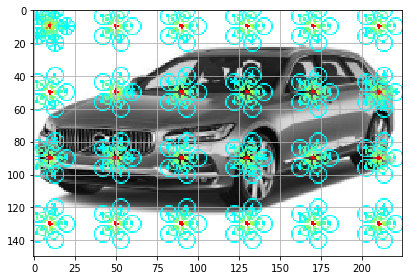

In [21]:
from skimage.feature import daisy

# lets first visualize what the daisy descripto looks like
features, img_desc = daisy(img, 
                           step=40, 
                           radius=10, 
                           rings=3, 
                           histograms=5, 
                           orientations=8, 
                           visualize=True)
imshow(img_desc)
plt.grid()

In [22]:
features = daisy(img, step=10, radius=10, rings=2, histograms=4, orientations=8, visualize=False)
print(features.shape)
print(features.shape[0]*features.shape[1]*features.shape[2])


(13, 21, 72)
19656


In [23]:
def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape),step=10, radius=10, rings=2, histograms=6, orientations=8, visualize=False)
    return feat.reshape((-1))

%time test_feature = apply_daisy(X[3],(height,width))
test_feature.shape

0.038 * len(X) # approximate how long it may run

Wall time: 110 ms


95.0

In [24]:
# apply to entire data, row by row,
%time daisy_features = np.apply_along_axis(apply_daisy, 1, X, (height,width))
print(daisy_features.shape) # 2500

Wall time: 3min 32s
(2500, 28392)


In [25]:
from sklearn.metrics.pairwise import pairwise_distances
# find the pairwise distance between all the different image features
%time dist_matrix = pairwise_distances(daisy_features)

Wall time: 6.06 s


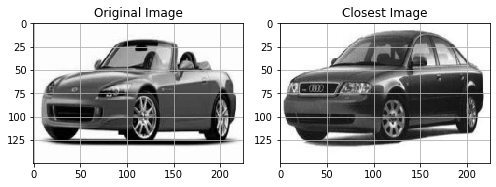

In [26]:
# find closest image to current image
idx1 = 32
distances = copy.deepcopy(dist_matrix[idx1,:])
distances[idx1] = np.infty # dont pick the same image!
idx2 = np.argmin(distances)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
imshow(X[idx1].reshape((height,width)))
plt.title("Original Image")
plt.grid()

plt.subplot(1,2,2)
imshow(X[idx2].reshape((height,width)))
plt.title("Closest Image")
plt.grid()

*Explanation for above*

Above you can see the use of DAISY to extract features from individual images and compare them to other images. We used DAISY because it looks for specific edges and differences within an image, which is what we are looking for when trying to find a specific type of car. Being able to see these edge differences is important when classifying types of cars.

In [40]:
# Visualize promise for prediction task
# Turn Numpy into Pandas

Cols = ["Feature " + str(i + 1) for i in range(len(daisy_features[0]))]
Rows = [x for x in names]
df = pd.DataFrame(data=daisy_features, index=Rows, columns=Cols)

                    Feature 1     Feature 2     Feature 3     Feature 4  \
Hyundai Elantra  5.865428e-09  5.865428e-09  5.865428e-09  5.865428e-09   
Hyundai Elantra  7.685565e-04  8.908566e-04  1.320314e-03  2.099119e-03   
Hyundai Elantra  7.355903e-03  1.164027e-02  1.890936e-02  9.793563e-03   
Hyundai Elantra  9.615385e-03  9.615385e-03  9.615385e-03  9.615385e-03   
Hyundai Elantra  9.615385e-03  9.615385e-03  9.615385e-03  9.615385e-03   
Hyundai Elantra  9.615385e-03  9.615385e-03  9.615385e-03  9.615385e-03   
Hyundai Elantra  3.884109e-03  7.702112e-04  2.777561e-04  6.161349e-04   
Hyundai Elantra  1.400181e-03  2.788134e-04  2.028940e-04  6.359374e-04   
Hyundai Elantra  1.200727e-02  7.655204e-03  1.157284e-02  9.459729e-03   
Hyundai Elantra  6.978676e-03  1.529901e-02  2.285397e-02  1.072186e-02   
Hyundai Elantra  1.105423e-03  5.514134e-04  1.767386e-04  5.632047e-05   
Hyundai Elantra  7.512700e-03  7.598080e-03  7.656648e-03  1.184617e-02   
Hyundai Elantra  1.786014

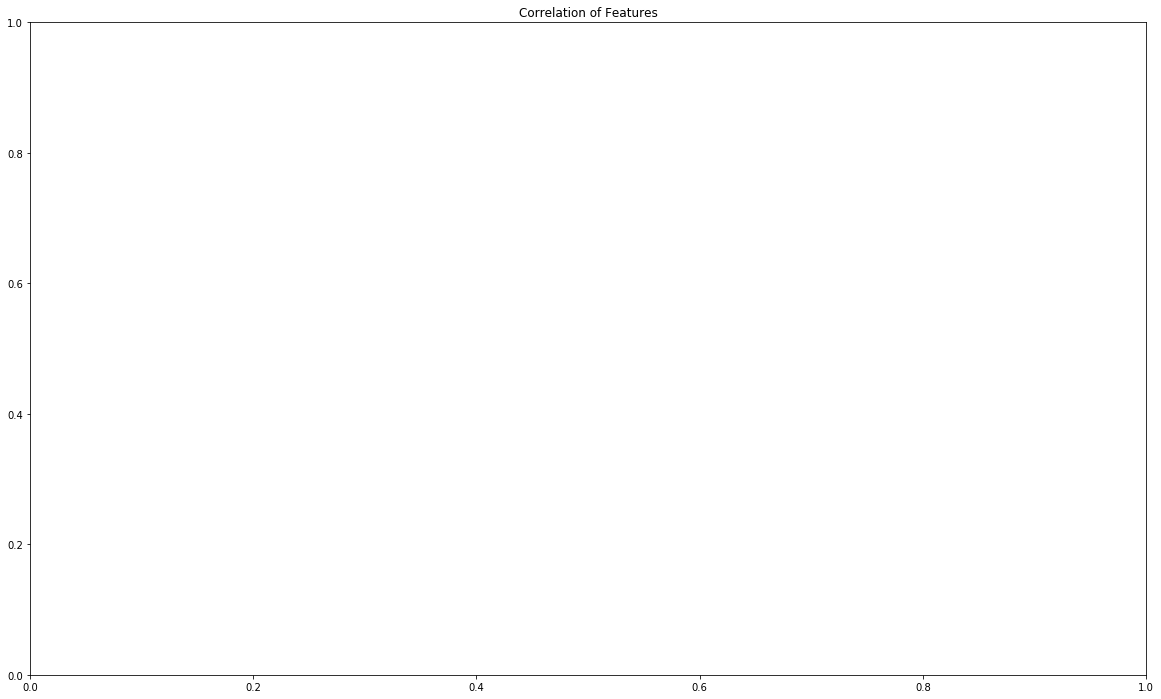

In [52]:
# Correlation Heatmap
plt.figure(figsize=(20,12))
plt.title('Correlation of Features')
test_corr_df = df.loc["Hyundai Elantra"]
print(test_corr_df)
# plt.pcolor(test_corr_df.corr())

# plt.yticks(np.arange(0.5, len(test_corr_df.keys()), 1), test_corr_df.keys())
# plt.xticks(np.arange(0.5, len(test_corr_df.keys()), 1), test_corr_df.keys())
# plt.colorbar()
# plt.show()

*Explanation for above*

This shows promise for our prediction task because it is sensitive to lines and angles. As shown above, the prediction task to find similar images does find cars of similar angles and types. It matches things like hatchbacks to hatchbacks, sedans to sedans, and SUVs to SUVs. While this is still primitive in what we want our prediction task to do, this shows that with more specificity and perhaps a more organized data set and increased knowledge we would be able to get the prediction to focus on even smaller detail that allows the algorithm to be able to distinguish between different manufacturers, and eventually perhaps even different models for these manufacturers. 

### **Exceptional Work**
***10 points*** You have free reign to provide any additional analyses. One idea (required for 7000 level students): perform feature extraction upon the images using a feature extractor that requires key point matching (such as SIFT/SURF/ORB or others). Then build a nearest neighbor classifier using a method appropriate for your chosen features. You will need to investigate appropriate methods for comparisons with your chosen feature extraction technique. NOTE: this often requires some type of brute force matching per pair of images, which can be computationally expensive).

In [ ]:
# what do for exceptional work

*Explanation*

(explain what looking at and compare the two extraction methods)